In [2]:

words = open('names.txt', 'r').read().splitlines()
import torch    
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [2]:

chars = sorted( list(set( ''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

itos = {i:s for s,i in stoi.items()}
itos
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [97]:

N = torch.zeros((27,27,27), dtype=torch.int32)


for w in words:
    # chs = ['.'] + ['.'] + list(w) + ['.'] + ['.']
    chs = ['.'] + list(w) + ['.'] 

    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        # print([ch1],[ch2],[ch3])
        N[ix1,ix2,ix3]+=1



In [42]:
N[1,:,0]

tensor([6640,   40,   36,   11,  106,  147,   14,    2, 1714,  183,   45,   34,
         175,  189, 1509,   12,    2,    7,  228,  173,   56,   15,   45,   11,
          11,  163,   38], dtype=torch.int32)

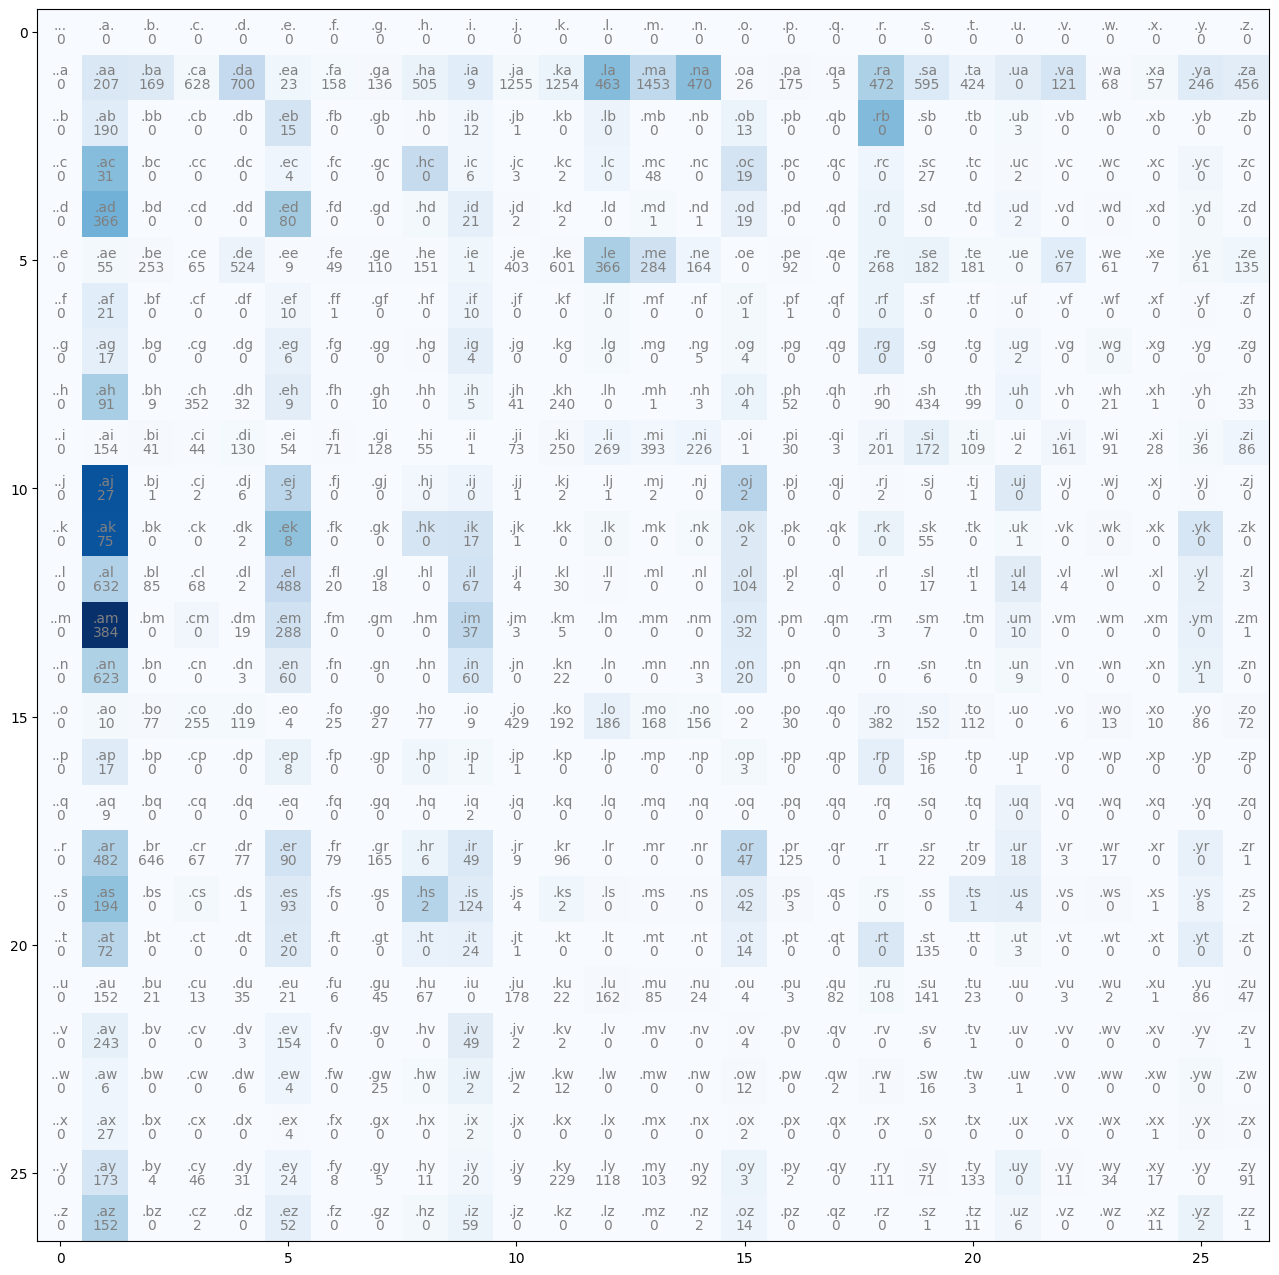

In [98]:
i=0
M = N[i,:,:]
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(M,cmap='Blues')
for k in range(27):
    for j in range (27):
        chstr=''.join([itos[i], itos[j], itos[k]])
        plt.text(j,k, chstr, ha="center",va="bottom",color='gray')
        plt.text(j,k, N[i,j,k].item(),  ha="center",va="top",color='gray')

In [99]:
P = N.float()
for i in range(27):
    T = P[i,:,:]
    T = T/T.sum(1,keepdim=True)
    P[i,:,:] = T
# P[:,:,0]

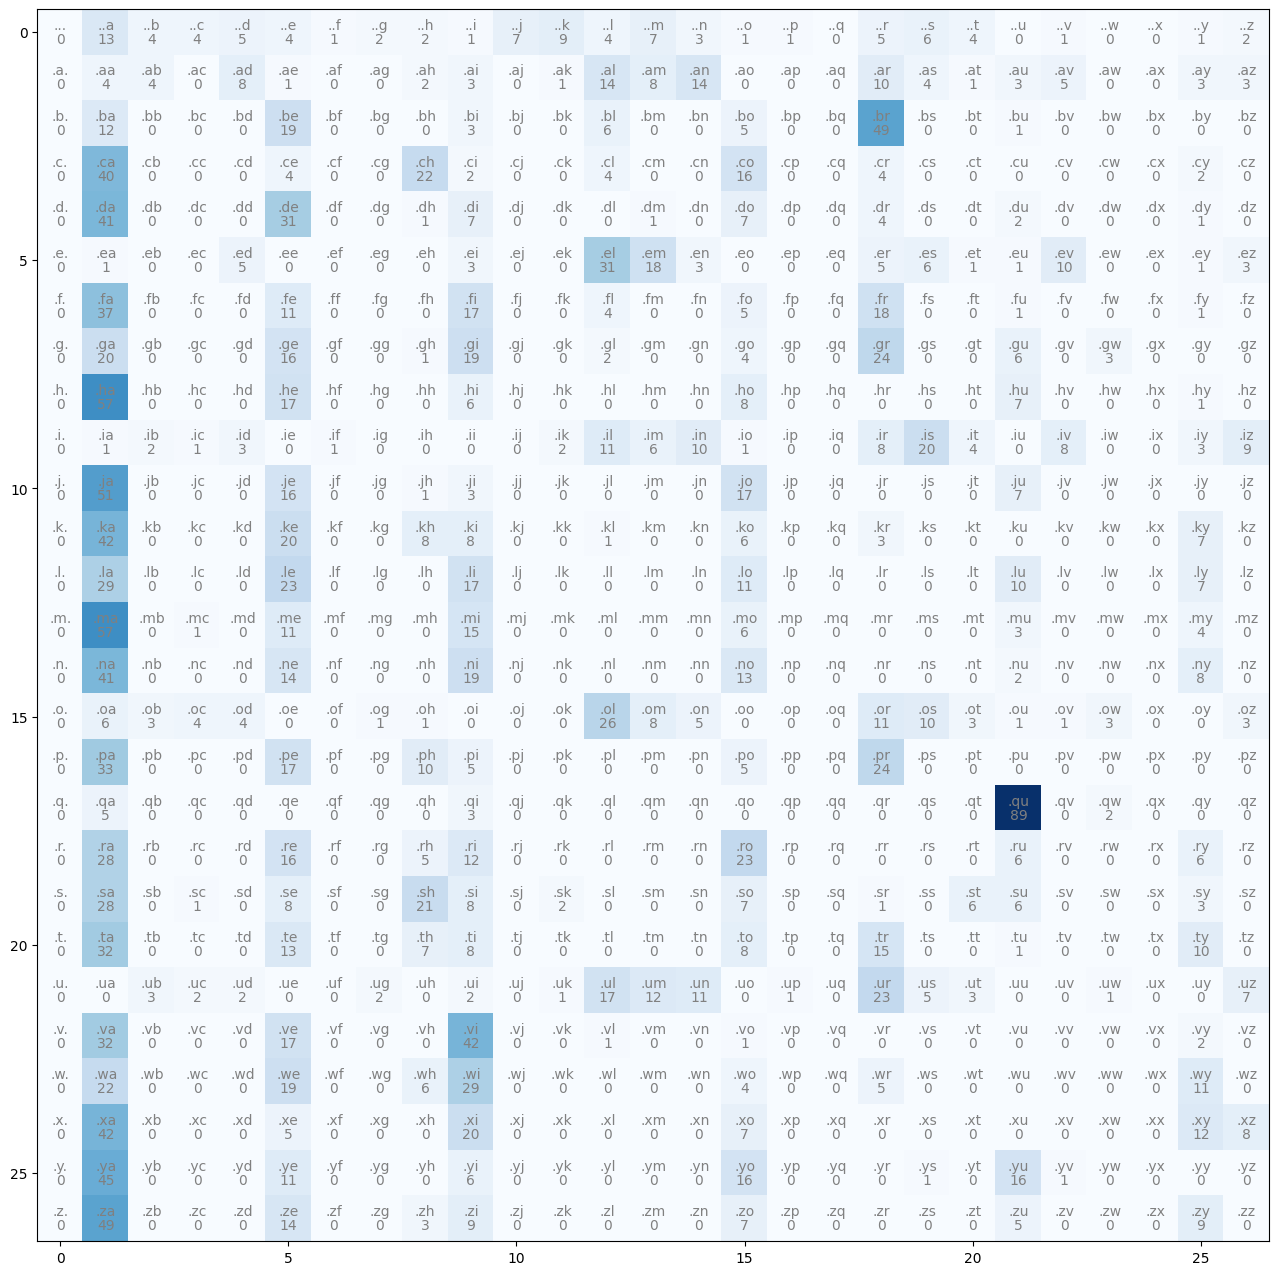

In [86]:
i=0
M = P[i,:,:]*100
M = M.int()

%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(M,cmap='Blues')
for k in range(27):
    for j in range (27):
        chstr=''.join([itos[i], itos[j], itos[k]])
        plt.text(k,j, chstr, ha="center",va="bottom",color='gray')
        plt.text(k,j, M[j,k].item(),  ha="center",va="top",color='gray')

In [100]:
g = torch.Generator().manual_seed(2147483647)

for i in range (30):
    ix = 0
    iy = 0
    out = []
    # p=P[ix,iy,:]
    # print(p)
    # ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    # print(itos[ix])
    # iy=ix

    while True:
        p=P[ix,iy,:]
        ix=iy
        iy = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # print(p, ix, iy)
        # print(itos[ix])
        out.append(itos[iy])
        if iy ==0:
            break
    print(''.join(out))
        

RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

In [113]:
log_likelihood = 0.0
n=0

for w in ["boti"]:
    chs = ['.'] + list(w) + ['.'] 
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        # print([ch1],[ch2],[ch3])
        prob = P[ix1,ix2,ix3]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        # print(f'{ch1}{ch2}{ch3}: {prob:.4f} {logprob:.4f}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

nll=tensor(11.3933)
2.848335027694702
